### 1. Add New Column and Save File
- You have a DataFrame with column Price.

- Create a new column Discounted_Price with (10% discounted price).

- Save the modified DataFrame as discounted_products.csv.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [15]:
# load csv file
df = pd.read_csv("Practice_day.csv", on_bad_lines='skip')
df.head()

,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3
0,E101,Alice,25.0,50000.0,1200,85,90,88
1,E103,Charlie,22.0,52000.0,1100,92,95,90
2,E101,Alice,25.0,50000.0,1200,85,90,88
3,E104,David,45.0,80000.0,2500,88,85,89
4,E105,Eve,29.0,58000.0,1300,76,79,81


In [16]:
# 10% (0.10)
df['Discounted_Price'] = df['Price'] * 0.10

df.head(2)

,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3,Discounted_Price
0,E101,Alice,25.0,50000.0,1200,85,90,88,120.0
1,E103,Charlie,22.0,52000.0,1100,92,95,90,110.0


In [18]:
# To save a the file (df.to_filetype('new_file_name'))

df.to_csv("discounted_products.csv")

In [19]:
# for checking discounted_products.csv this is save or not?

# if we can read this file then it's save

df2 = pd.read_csv("discounted_products.csv")
df2.head(3)


,Unnamed: 0,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3,Discounted_Price
0,0,E101,Alice,25.0,50000.0,1200,85,90,88,120.0
1,1,E103,Charlie,22.0,52000.0,1100,92,95,90,110.0
2,2,E101,Alice,25.0,50000.0,1200,85,90,88,120.0


### 2. Check Duplicates and Remove Them

- Column: EmployeeID
- Tasks:
     - Count duplicate entries
     - Remove duplicates
     - Display cleaned DataFrame


In [51]:
# load csv file
df = pd.read_csv("Practice_day.csv", on_bad_lines='skip')
df.head(2)

,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3
0,E101,Alice,25.0,50000.0,1200,85,90,88
1,E103,Charlie,22.0,52000.0,1100,92,95,90


In [38]:
# Check and count Duplicates entries on EmployeeID column
int(df.duplicated('EmployeeID').sum())

1

In [43]:
# Remove duplicates on EmployeeID column
clear_df = df.drop_duplicates(subset = ['EmployeeID'],keep = 'first')

In [44]:
# Display cleaned DataFrame
clear_df

,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3
0,E101,Alice,25.0,50000.0,1200,85,90,88
1,E103,Charlie,22.0,52000.0,1100,92,95,90
3,E104,David,45.0,80000.0,2500,88,85,89
4,E105,Eve,29.0,58000.0,1300,76,79,81
5,E106,Frank,NaN,75000.0,2200,90,91,92
6,E107,Grace,34.0,NaN,1900,81,83,80
7,E108,Heidi,38.0,NaN,1800,84,86,88
8,E109,Ivan,26.0,53000.0,1400,95,92,94


In [42]:
# not Clear DataFrame
df

,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3
0,E101,Alice,25.0,50000.0,1200,85,90,88
1,E103,Charlie,22.0,52000.0,1100,92,95,90
2,E101,Alice,25.0,50000.0,1200,85,90,88
3,E104,David,45.0,80000.0,2500,88,85,89
4,E105,Eve,29.0,58000.0,1300,76,79,81
5,E106,Frank,NaN,75000.0,2200,90,91,92
6,E107,Grace,34.0,NaN,1900,81,83,80
7,E108,Heidi,38.0,NaN,1800,84,86,88
8,E109,Ivan,26.0,53000.0,1400,95,92,94


### 3. Handle Missing Values

- Columns: Age, Salary
-  Tasks:
    - Count missing values
    - Fill missing Age with mean age
    - Drop rows where Salary is missing

In [ ]:
# Check Null values (way to to check the entire dataframe contain null or not in column-wise)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EmployeeID    9 non-null      object 
 1   EmployeeName  9 non-null      object 
 2   Age           8 non-null      float64
 3   Salary        7 non-null      float64
 4   Price         9 non-null      int64  
 5   Marks1        9 non-null      int64  
 6   Marks2        9 non-null      int64  
 7   Marks3        9 non-null      int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 708.0+ bytes


- According to the info() method we can see the total elements are 9 (EmployeeID shows with duplicate includes).
- But Age column as 8 entires, that means here one value is NaN (Null) or missing value

In [ ]:
# To check in Age column has null value or not
df['Age'].isnull()

# if Return True (means here, NaN value is present)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
Name: Age, dtype: bool

In [64]:
# Count missing values Missing value on Age column

total_null = df['Age'].isnull().sum()

print("Total NaN value on Age Column: ", total_null)

Total NaN value on Age Column:  1


#### - Fill missing Age with mean age

In [69]:
# fill missing value

df['Age'].fillna(df['Age'].mean(),inplace = True)
df


C:\Users\HP\AppData\Local\Temp\ipykernel_5016\578441336.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)


,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3
0,E101,Alice,25.0,50000.0,1200,85,90,88
1,E103,Charlie,22.0,52000.0,1100,92,95,90
2,E101,Alice,25.0,50000.0,1200,85,90,88
3,E104,David,45.0,80000.0,2500,88,85,89
4,E105,Eve,29.0,58000.0,1300,76,79,81
5,E106,Frank,30.5,75000.0,2200,90,91,92
6,E107,Grace,34.0,NaN,1900,81,83,80
7,E108,Heidi,38.0,NaN,1800,84,86,88
8,E109,Ivan,26.0,53000.0,1400,95,92,94


#### - Drop rows where Salary is missing

In [71]:
# Drop missing value on Salary Column

new_df = df.dropna(subset = ['Salary'])

new_df

,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3
0,E101,Alice,25.0,50000.0,1200,85,90,88
1,E103,Charlie,22.0,52000.0,1100,92,95,90
2,E101,Alice,25.0,50000.0,1200,85,90,88
3,E104,David,45.0,80000.0,2500,88,85,89
4,E105,Eve,29.0,58000.0,1300,76,79,81
5,E106,Frank,30.5,75000.0,2200,90,91,92
8,E109,Ivan,26.0,53000.0,1400,95,92,94


### 4. Apply Statistical Functions
- Columns: Marks1, Marks2, Marks3

-  Tasks:
    - Calculate mean, max for each subject
    - Compute total marks per student
    - Find standard deviation of total marks


In [72]:
df

,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3
0,E101,Alice,25.0,50000.0,1200,85,90,88
1,E103,Charlie,22.0,52000.0,1100,92,95,90
2,E101,Alice,25.0,50000.0,1200,85,90,88
3,E104,David,45.0,80000.0,2500,88,85,89
4,E105,Eve,29.0,58000.0,1300,76,79,81
5,E106,Frank,30.5,75000.0,2200,90,91,92
6,E107,Grace,34.0,NaN,1900,81,83,80
7,E108,Heidi,38.0,NaN,1800,84,86,88
8,E109,Ivan,26.0,53000.0,1400,95,92,94


#### - Calculate mean, max for each subject

In [79]:
# individual each subjects mean, max

# subject : Marks1
marks1_max = df['Marks1'].max()
marks1_mean = df['Marks1'].mean()


# subject : Marks2
marks2_max = df['Marks2'].max()
marks2_mean = df['Marks2'].mean()


# subject : Marks3
marks3_max = df['Marks3'].max()
marks3_mean = df['Marks3'].mean()

# Display
print("For Subject - Marks1")
print(f'Mean - {marks1_mean:.2f}, Max - {marks1_max}')

print("\nFor Subject - Marks2")
print(f'Mean - {marks2_mean:.2f}, Max - {marks2_max}')

print("\nFor Subject - Marks3")
print(f'Mean - {marks3_mean:.2f}, Max - {marks3_max}')

For Subject - Marks1
Mean - 86.22, Max - 95

For Subject - Marks2
Mean - 87.89, Max - 95

For Subject - Marks3
Mean - 87.78, Max - 94


#### - Compute total marks per student

In [101]:
# load csv file
df = pd.read_csv("Practice_day.csv", on_bad_lines='skip')
df.head(2)

,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3
0,E101,Alice,25.0,50000.0,1200,85,90,88
1,E103,Charlie,22.0,52000.0,1100,92,95,90


In [ ]:
# Compute the total Marks (colum-wise calculation)

# df['Total_Marks'] = df.iloc[::,-2:-5:-1].sum(axis = 1)

# df['Total_Marks'] = df.iloc[::,5:8].sum(axis = 1)

# df["Total_Marks"] = df['Marks1'] + df['Marks2'] + df['Marks3']

df['Total_marks'] = df[['Marks1', 'Marks2', 'Marks3']].sum(axis = 1)
df


,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3,Total_marks
0,E101,Alice,25.0,50000.0,1200,85,90,88,263
1,E103,Charlie,22.0,52000.0,1100,92,95,90,277
2,E101,Alice,25.0,50000.0,1200,85,90,88,263
3,E104,David,45.0,80000.0,2500,88,85,89,262
4,E105,Eve,29.0,58000.0,1300,76,79,81,236
5,E106,Frank,NaN,75000.0,2200,90,91,92,273
6,E107,Grace,34.0,NaN,1900,81,83,80,244
7,E108,Heidi,38.0,NaN,1800,84,86,88,258
8,E109,Ivan,26.0,53000.0,1400,95,92,94,281


#### - Find standard deviation of total marks

In [108]:
df['Total_marks'].std()

14.683702227677838

### 5. Histogram, Bar, Scatter, Pie
- Create:
    - Histogram of Age
    - Scatter plot (Age vs Salary)
    - Scatter plot ( Price vs Discounted Price) 


In [110]:
new_df

,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3
0,E101,Alice,25.0,50000.0,1200,85,90,88
1,E103,Charlie,22.0,52000.0,1100,92,95,90
2,E101,Alice,25.0,50000.0,1200,85,90,88
3,E104,David,45.0,80000.0,2500,88,85,89
4,E105,Eve,29.0,58000.0,1300,76,79,81
5,E106,Frank,30.5,75000.0,2200,90,91,92
8,E109,Ivan,26.0,53000.0,1400,95,92,94


#### - Histogram of Age

In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

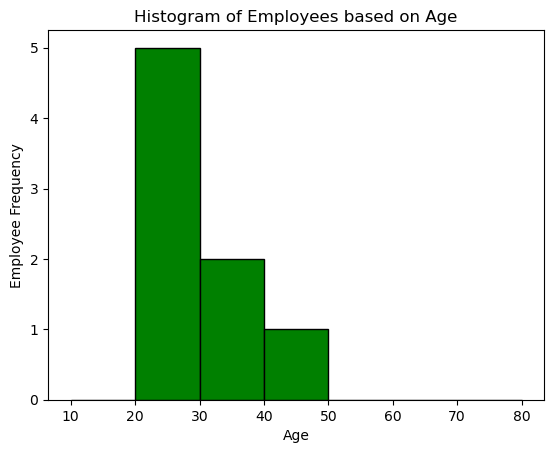

In [ ]:
plt.xlabel("Age")
plt.ylabel("Employee Frequency")
plt.title("Histogram of Employees based on Age")

plt.hist(df['Age'],bins=[10,20,30,40,50,60,70,80], color='g', edgecolor='black')

plt.show()

# bins(interval between Ages)
# if Age start with 20 then : lower_Age <= bin < Top_Age 
# eg: bins = [Lower_age, 30, ....., Top_age]
#  so, bins = [20, 30, 40, ...... 80]

#### - Scatter plot (Age vs Salary)

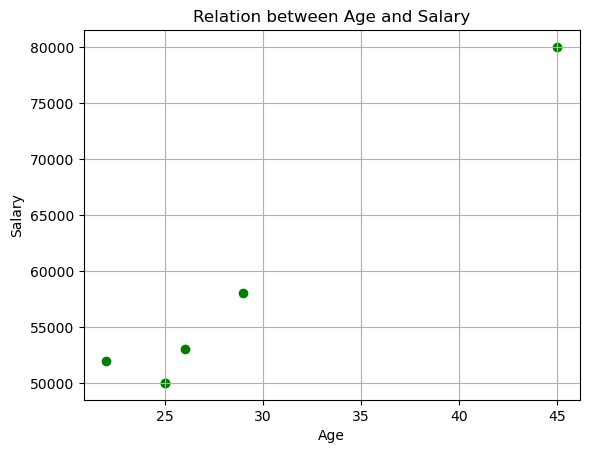

In [132]:
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Relation between Age and Salary")

plt.scatter(df['Age'], df['Salary'],color= 'g')

plt.grid()
plt.show()

#### - Scatter plot ( Price vs Discounted Price) 

In [ ]:
# df2 = pd.read_csv("discounted_products.csv")
# df2.head(3)

In [136]:
df2.head()

,Unnamed: 0,EmployeeID,EmployeeName,Age,Salary,Price,Marks1,Marks2,Marks3,Discounted_Price
0,0,E101,Alice,25.0,50000.0,1200,85,90,88,120.0
1,1,E103,Charlie,22.0,52000.0,1100,92,95,90,110.0
2,2,E101,Alice,25.0,50000.0,1200,85,90,88,120.0
3,3,E104,David,45.0,80000.0,2500,88,85,89,250.0
4,4,E105,Eve,29.0,58000.0,1300,76,79,81,130.0


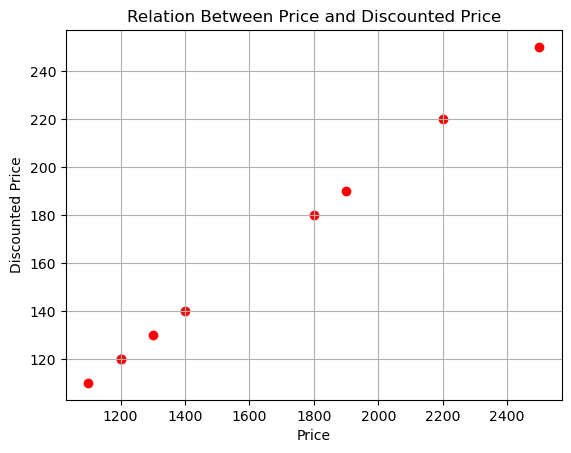

In [139]:
# Relation between Price and Discounted Price column

plt.xlabel("Price")
plt.ylabel("Discounted Price")
plt.title("Relation Between Price and Discounted Price")

plt.scatter(df2['Price'], df2['Discounted_Price'], color='r')

plt.grid()
plt.show()


- Here , Relation between Price and Discounted Price is liner positive Correlation